<a href="https://colab.research.google.com/github/Communist02/BIN-22-1_Mazur_Denis_AI/blob/main/z5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

In [245]:
!pip install pandas scikit-learn seaborn scipy

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('diamond.csv')

df['is_overprice'] = np.where(df['Price'] >= 10000, 1, 0)

y = df['is_overprice'] # выбираем целевую переменную (категориальную)
X = df.drop('is_overprice', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('Price', axis=1)
df.drop('Price', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   is_overprice  6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [247]:
X

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA
...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA
5996,1.00,Very Good,D,SI1,VG,VG,GIA
5997,1.02,Ideal,D,SI1,EX,EX,GIA
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA


Преобразование категориальных переменных остается без изменений

In [248]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [249]:
X

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [250]:
df_corr_test = X.copy()

df_corr_test['y'] = y
df_corr_test

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,y
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,0
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,0
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,0
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,True,0
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,0
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,1


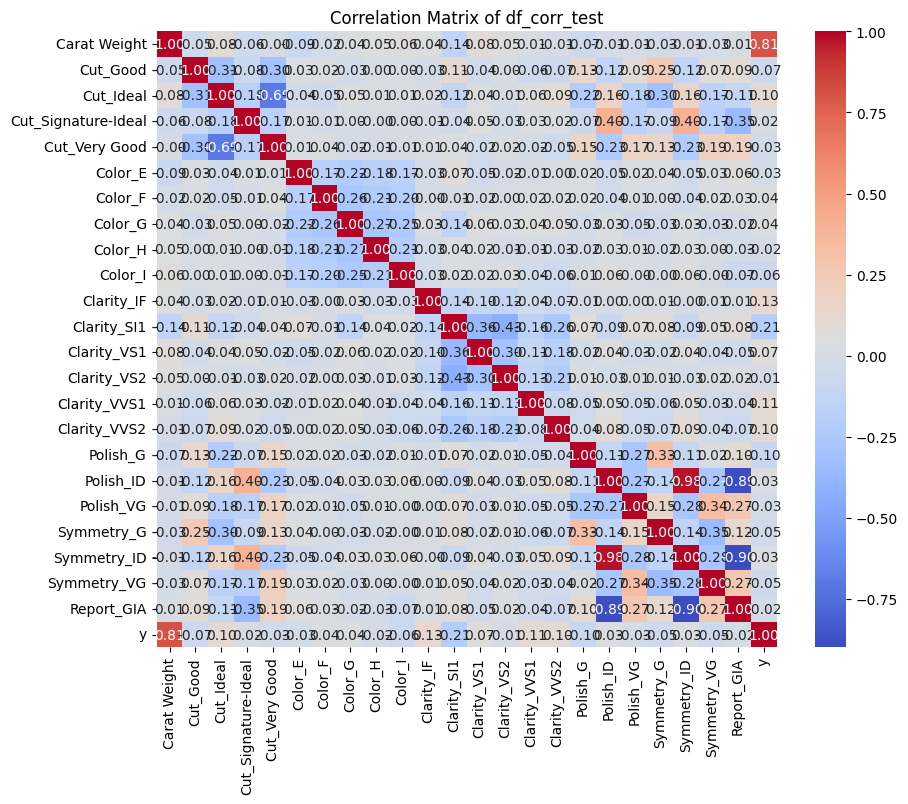

In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции
correlation_matrix = df_corr_test.select_dtypes(['int', 'float', 'bool']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()
    elif regularization == 'l2':
        model = Ridge()
    else:
        model = LinearRegression()  # Без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [253]:
resolve_regression(X, y)
None


Regularization: None
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.07
R^2 Score: 0.69


In [254]:
resolve_regression(X[['Carat Weight']], y)
None


Regularization: None
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.09
R^2 Score: 0.63


Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [255]:
X

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [256]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Carat Weight         6000 non-null   float64
 1   Cut_Good             6000 non-null   bool   
 2   Cut_Ideal            6000 non-null   bool   
 3   Cut_Signature-Ideal  6000 non-null   bool   
 4   Cut_Very Good        6000 non-null   bool   
 5   Color_E              6000 non-null   bool   
 6   Color_F              6000 non-null   bool   
 7   Color_G              6000 non-null   bool   
 8   Color_H              6000 non-null   bool   
 9   Color_I              6000 non-null   bool   
 10  Clarity_IF           6000 non-null   bool   
 11  Clarity_SI1          6000 non-null   bool   
 12  Clarity_VS1          6000 non-null   bool   
 13  Clarity_VS2          6000 non-null   bool   
 14  Clarity_VVS1         6000 non-null   bool   
 15  Clarity_VVS2         6000 non-null   b

Отбор признаков по корреляции

In [257]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


In [258]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [259]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [260]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.08
R^2 Score: 0.66


In [261]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.08
R^2 Score: 0.68


Regularization: None
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.08
R^2 Score: 0.68


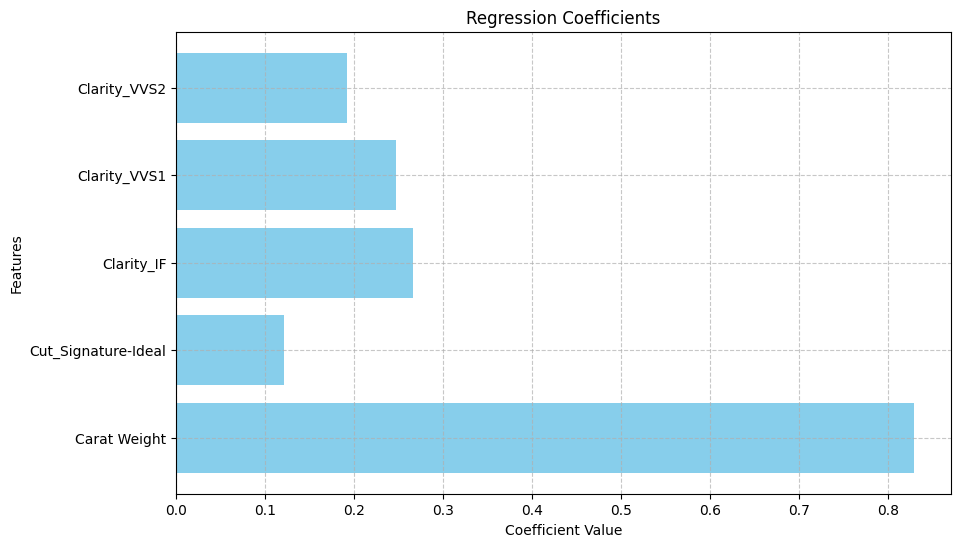

In [262]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [263]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


<ipython-input-263-5f572d6f06ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [264]:
X_selected_rfe

,Carat Weight,Cut_Signature-Ideal,Clarity_IF,Clarity_VVS1,Clarity_VVS2
0,0.162037,False,False,False,False
1,0.037037,False,False,False,False
2,0.046296,False,False,False,False
3,0.074074,False,False,False,False
4,0.037037,False,False,False,False
...,...,...,...,...,...
5995,0.129630,False,False,False,False
5996,0.115741,False,False,False,False
5997,0.125000,False,False,False,False
5998,0.240741,True,False,False,False


Regularization: None
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.08
R^2 Score: 0.68


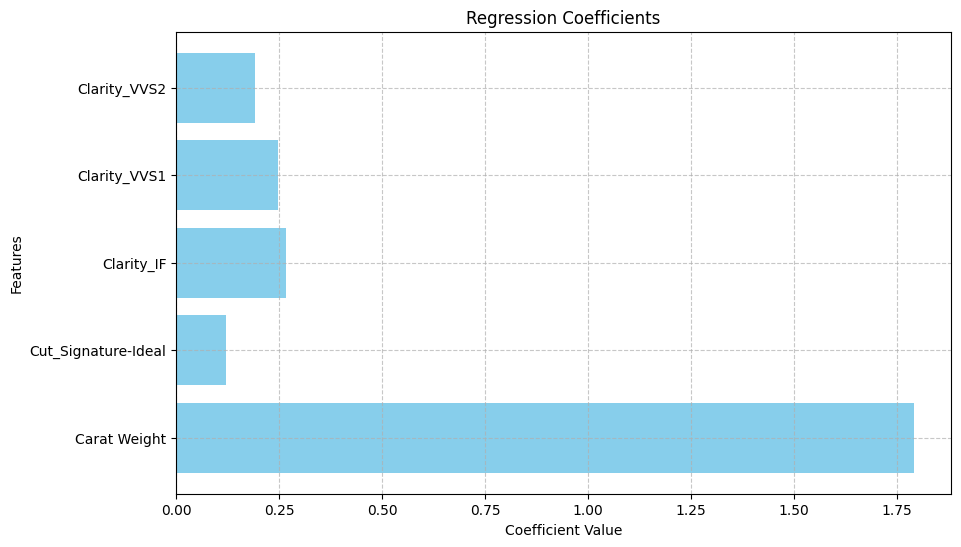

In [265]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [266]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.08
R^2 Score: 0.68


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Резуляризация

In [267]:
X

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

In [268]:
resolve_regression(X, y, regularization='l1')
None


Regularization: l1
Mean Absolute Error (MAE): 0.47
Mean Squared Error (MSE): 0.24
R^2 Score: -0.00


In [269]:
resolve_regression(X, y, regularization='l2')
None


Regularization: l2
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.07
R^2 Score: 0.69


In [270]:
resolve_regression(X, y, regularization=None)
None


Regularization: None
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.07
R^2 Score: 0.69


## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder

# Загрузка набора данных
df = pd.read_csv('diamond.csv')

In [272]:
encoder = LabelEncoder()
df['Cut'] = encoder.fit_transform(df['Cut'])
df['Color'] = encoder.fit_transform(df['Color'])
df['Clarity'] = encoder.fit_transform(df['Clarity'])
df['Polish'] = encoder.fit_transform(df['Polish'])
df['Symmetry'] = encoder.fit_transform(df['Symmetry'])
df['Report'] = encoder.fit_transform(df['Report'])

df['Cut'] = df['Cut'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Clarity'] = df['Clarity'].astype('category')
df['Polish'] = df['Polish'].astype('category')
df['Symmetry'] = df['Symmetry'].astype('category')
df['Report'] = df['Report'].astype('category')

In [273]:
# В моем случае я дропаю базовую переменную, а не только. Y
y = df['Price'] # выбираем целевую переменную (категориальную)
X = df.drop('Price', axis=1) # переменные для проверки влияния

In [274]:
X

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,2,4,2,3,0,1
1,0.83,2,4,3,2,2,0
2,0.85,2,4,2,0,0,1
3,0.91,2,1,2,3,3,1
4,0.83,2,3,2,0,0,1
...,...,...,...,...,...,...,...
5995,1.03,2,0,2,0,0,1
5996,1.00,4,0,2,3,3,1
5997,1.02,2,0,2,0,0,1
5998,1.27,3,3,3,0,0,1


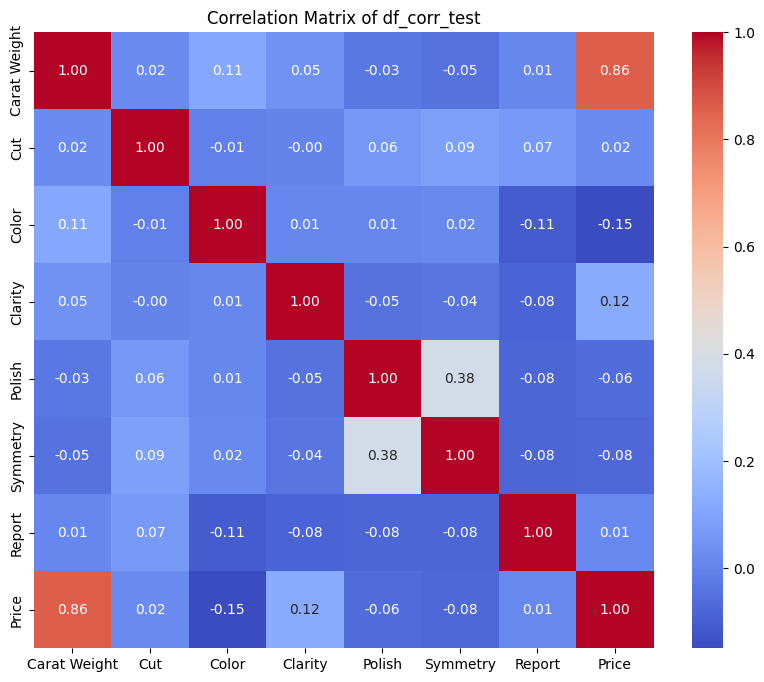

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции
correlation_matrix = df.select_dtypes(['int', 'float', 'category']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [276]:
# Разделяем данные на тренировочные и оставшиеся (валидация + тест)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Разделяем оставшиеся данные на валидационные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [277]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LinearRegression()

sfs = SequentialFeatureSelector(base_model, n_features_to_select=3)
sfs.fit(X_train, y_train)

# Получаем список отобранных признаков
selected_features_sfs = X.columns[sfs.get_support()]
print("Отобранные признаки SFS:", selected_features_sfs)

# Отбираем признаки
X_train = X_train[selected_features_sfs]
X_validation = X_validation[selected_features_sfs]
X_test = X_test[selected_features_sfs]

Отобранные признаки SFS: Index(['Carat Weight', 'Color', 'Clarity'], dtype='object')


In [278]:
def learn(model=LinearRegression()):
    model.fit(X_train, y_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    mae = mean_absolute_error(y_validation, y_valid_pred)
    mse = mean_squared_error(y_validation, y_valid_pred)
    r2 = r2_score(y_validation, y_valid_pred)

    print("На валидационных данных:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print("\nНа тестовых данных:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

In [279]:
learn(LinearRegression())

На валидационных данных:
Mean Absolute Error (MAE): 2620.83
Mean Squared Error (MSE): 22382701.32
R^2 Score: 0.79

На тестовых данных:
Mean Absolute Error (MAE): 2765.39
Mean Squared Error (MSE): 26123056.50
R^2 Score: 0.78


In [280]:
from sklearn.neighbors import KNeighborsRegressor
learn(KNeighborsRegressor())

На валидационных данных:
Mean Absolute Error (MAE): 874.24
Mean Squared Error (MSE): 3422342.40
R^2 Score: 0.97

На тестовых данных:
Mean Absolute Error (MAE): 933.47
Mean Squared Error (MSE): 5386798.84
R^2 Score: 0.95


In [281]:
from sklearn.tree import DecisionTreeRegressor
learn(DecisionTreeRegressor())

На валидационных данных:
Mean Absolute Error (MAE): 906.99
Mean Squared Error (MSE): 3012676.60
R^2 Score: 0.97

На тестовых данных:
Mean Absolute Error (MAE): 886.34
Mean Squared Error (MSE): 3027247.44
R^2 Score: 0.97
